In [ ]:
from google.colab import files
uploaded = files.upload()

Saving date_RegresieLogistica.csv to date_RegresieLogistica.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import math
import copy
%matplotlib inline
df=pd.read_csv('date_RegresieLogistica.csv')
df.head(5)

,1,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:

column_names = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
                'concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                'compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
                'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst',
                'fractal_dimension_worst'
]


In [ ]:
df = pd.read_csv('date_RegresieLogistica.csv', header=None, names=column_names)

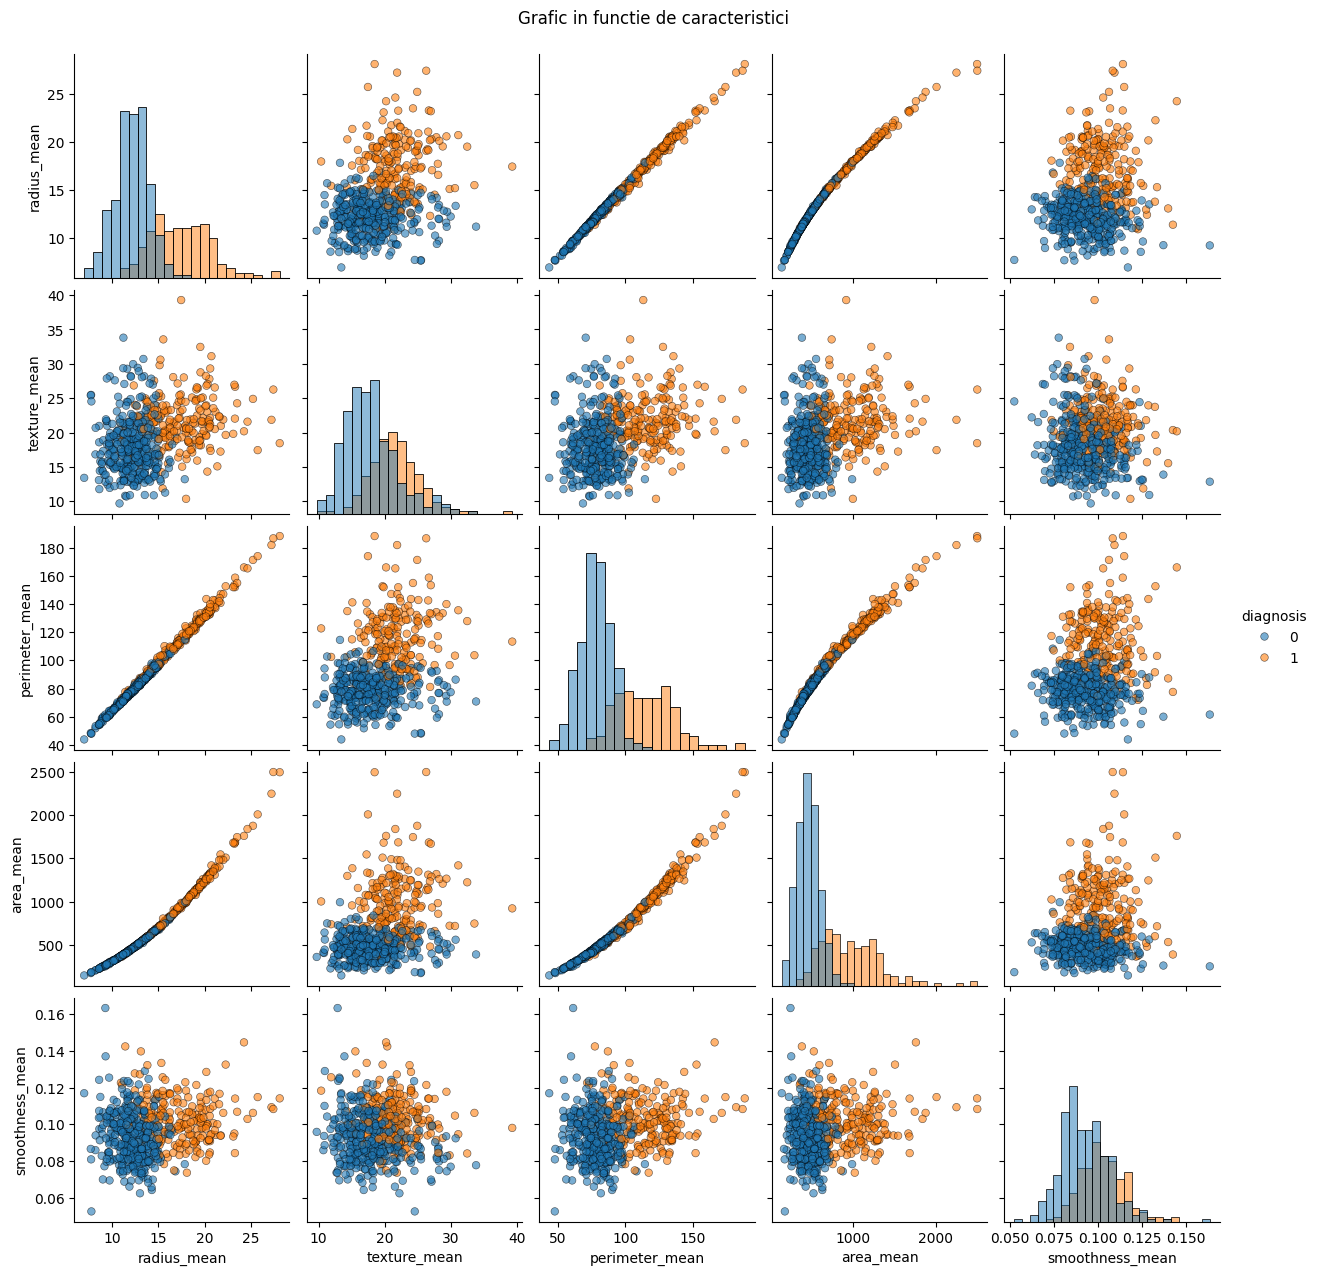

In [ ]:

subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

df_pair = df[['diagnosis'] + subset]

sns.pairplot(df_pair, hue='diagnosis', diag_kind='hist',
             plot_kws={'alpha':0.6, 's':30, 'edgecolor':'k'},
             diag_kws={'edgecolor':'k'})
plt.suptitle('Grafic in functie de caracteristici', y=1.02)
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
m,n=X_train_scaled.shape

In [ ]:
print ('Marimea lui X_train este:'+ str(X_train.shape))
print ('Marimea lui y_train este:'+ str(y_train.shape))
print('Avem m=%d exemple de antrenament' % (len(y_train)))

Marimea lui X_train este:(455, 30)
Marimea lui y_train este:(455, 1)
Avem m=455 exemple de antrenament


In [ ]:
y_train = y_train.to_numpy().reshape(-1, 1)
counts = np.bincount(y_train.flatten())
count0, count1 = counts[0], counts[1]
m_train = y_train.shape[0]
w0 = m_train / (2 * count0)
w1 = m_train / (2 * count1)
weights_train = np.where(y_train.flatten() == 0, w0, w1).reshape(-1, 1)

test:

In [ ]:
print("counts:", np.bincount(y_train.flatten()))
print("w0, w1:", weights_train[:5].flatten())
print("weights_train shape:", weights_train.shape)

counts: [285 170]
w0, w1: [1.33823529 0.79824561 0.79824561 1.33823529 1.33823529]
weights_train shape: (455, 1)


Vom arata primele 5 valori ale lui X_train si tipul de variabila, ce vor fi intr-o ordine random deoarece train_test_split le modifica ordinea.


In [ ]:
print("Primele 5 elemente din X_train sunt:\n", X_train.head(5))
print("Tipul de variabila a lui X_train:", type(X_train))

Primele 5 elemente din X_train sunt:
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
10         16.02         23.24          102.70      797.8          0.08206   
170        12.32         12.39           78.85      464.1          0.10280   
407        12.85         21.37           82.63      514.5          0.07551   
430        14.90         22.53          102.10      685.0          0.09947   
27         18.61         20.25          122.10     1094.0          0.09440   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
10            0.06669         0.03299              0.03323         0.1528   
170           0.06981         0.03987              0.03700         0.1959   
407           0.08316         0.06126              0.01867         0.1580   
430           0.22250         0.27330              0.09711         0.2041   
27            0.10660         0.14900              0.07731         0.1697   

     fractal_dimension_mean  .

Acum primele 5 valori pentru y_train, care vor fi etichetele tumorilor de la X_train.

In [ ]:
print("Primele 5 elemente din X_train sunt:\n", y_train[:5])
print("Tipul de variabila a lui X_train:", type(y_train))

Primele 5 elemente din X_train sunt:
 [[1]
 [0]
 [0]
 [1]
 [1]]
Tipul de variabila a lui X_train: <class 'numpy.ndarray'>


Vom verifica marimea variabilelor, inclusiv numarul exemplelor de antrenament.

Graficul facut cu PCA pentru a combina toate caracteristicilein 2 caracteristici principale.

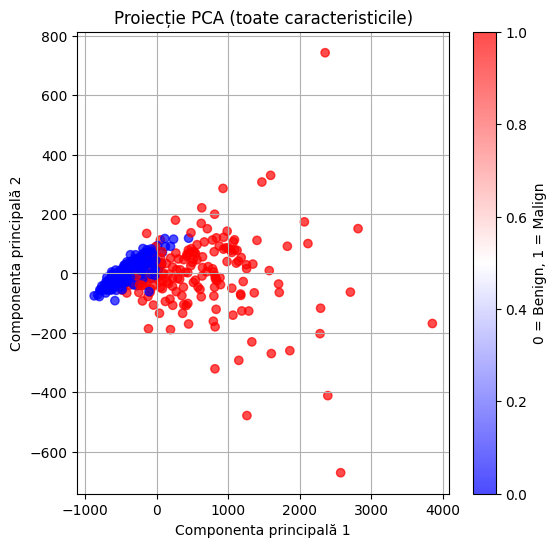

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Componenta principală 1')
plt.ylabel('Componenta principală 2')
plt.title('Proiecție PCA (toate caracteristicile)')
plt.colorbar(label='0 = Benign, 1 = Malign')
plt.grid(True)
plt.show()

Deoarece valorile au domenii atat de diferite, le vom scala cu normalizarea pentru a avea un domeniu comun. Vom scala inclusiv valorile de test.

In [ ]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)
X_train_scaled = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test_scaled  = (X_test - X_train_min) / (X_train_max - X_train_min)

In [ ]:
m,n=X_train_scaled.shape
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train).reshape(-1, 1)

Vom arata graficul dupa scalare.

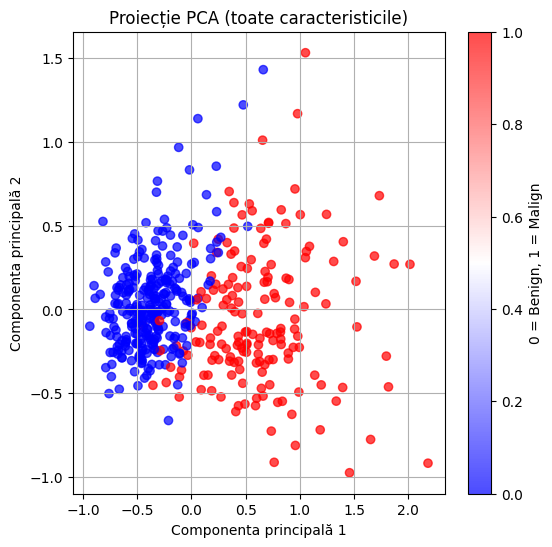

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)


plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Componenta principală 1')
plt.ylabel('Componenta principală 2')
plt.title('Proiecție PCA (toate caracteristicile)')
plt.colorbar(label='0 = Benign, 1 = Malign')
plt.grid(True)
plt.show()

In [ ]:
def sigmoid(z):
  g=1/(1+np.exp(-z))
  return g

Vom defini functia de cost cu regularizare pentru a ne feri de overfitting.

In [ ]:
def calculare_cost_regresie_logistica(X, y, w, b,weights, lambda_=1):
  m,n=X.shape
  cost=0.0
  for i in range(m):
    z_i=np.dot(X[i],w)+b
    f_wb_i=sigmoid(z_i)
    cost += weights[i] * (-y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i))

  cost=cost/m
  reg_cost=0.0

  for j in range(1,n):
    reg_cost+=(w[j]**2)

  reg_cost=reg_cost*(lambda_/(2*m))
  total_cost=cost+reg_cost
  return total_cost

Test:

In [ ]:
cost0 = calculare_cost_regresie_logistica(
    X_train_scaled,
    y_train,
    np.zeros((n,1)),  # w = 0
    0.0,             # b = 0
    weights_train,   # ponderile „balanced”
    lambda_=1.0
)
print("Cost inițial (se așteaptă ≈0.693):", cost0)


Cost inițial (se așteaptă ≈0.693): [0.69314718]


Vom defini gradient descent regularizatpentru a calcula parametrii w si b.

In [ ]:
def calculare_gradient_descent(X,y,w,b,weights ,*argv):
  m,n=X.shape
  dj_dw=np.zeros_like(w)
  dj_db=0.0
  for i in range(m):
    z_wb= np.dot(X[i],w)+b
    f_wb_i= sigmoid(z_wb)
    err_i=(f_wb_i-y[i])*weights[i]

    for j in range(n):
      dj_dw[j]+=err_i*X[i,j]
    dj_db+=err_i

  dj_dw=dj_dw/m
  dj_db=dj_db/m

  return dj_db,dj_dw

In [ ]:
def calculare_gradient_descent_regularizat(X,y,w,b,weights,lambda_=1):
  m,n=X.shape

  dj_db, dj_dw= calculare_gradient_descent(X,y,w,b, weights)

  for j in range(1,n):
    dj_dw[j]= dj_dw[j]+(lambda_/m)*w[j]
  return dj_db,dj_dw

test:

In [ ]:
# 3.1. Redefinește w0, b0
initial_w = np.zeros((n,1))
initial_b = 0.0

# 3.2. Apelează doar gradientul, fără antrenare
dj_db0, dj_dw0 = calculare_gradient_descent_regularizat(
    X_train_scaled,  # (m_train, n)
    y_train,         # (m_train, 1)
    initial_w,       # (n, 1) cu toți coeficienții zero
    initial_b,       # 0.0
    weights_train,   # (m_train, 1)
    lambda_=1.0
)
print("dj_db0:", dj_db0)
print("dj_dw0 (primele 5 coefs):", dj_dw0.flatten()[:5])

dj_db0: [-2.4156501e-17]
dj_dw0 (primele 5 coefs): [-0.06367165 -0.03097946 -0.06524892 -0.05555064 -0.02845075]


Vom vedea daca functioneaza testand pentru w initial = 0 si b initial = 0.

In [ ]:
#m,n=X_train_scaled.shape
print(f'm={m}, n={n}')
initial_test_w=np.zeros(n)
initial_test_b = 0.

#X_train_scaled = np.array(X_train_scaled)
#y_train = np.array(y_train).reshape(-1, 1)

dj_db, dj_dw = calculare_gradient_descent(X_train_scaled, y_train, initial_test_w, initial_test_b,weights_train)
print (f'dj_db pentru b si w initiali: {dj_db}')
print (f'dj_dw pentru w si b initiali: {dj_dw.tolist()}')

m=455, n=30
dj_db pentru b si w initiali: [-2.4156501e-17]
dj_dw pentru w si b initiali: [-0.06367165362549311, -0.030979462072994658, -0.06524892067327426, -0.055550643654235676, -0.02845074604850676, -0.05176895957999625, -0.06755725004424884, -0.07898601579378216, -0.024600546225933183, -0.00042189221808258746, -0.030299314976474194, 0.00041983621875014553, -0.02823513681220993, -0.024904125025962287, 0.0028379737880341563, -0.024891543908321604, -0.009408830279054734, -0.0247453654695445, -0.00038817566140958215, -0.0033018389598581956, -0.0699859776148472, -0.039033774350274275, -0.06878625738960618, -0.05406436219115835, -0.034550421516458825, -0.04657112605427067, -0.05623198098728311, -0.093236685710638, -0.027342024196982066, -0.020060737310244752]


<ipython-input-35-28f7a09b417c>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]+=err_i*X[i,j]


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters,weights, lambda_):
  m=X.shape[0]
  J_history=[]
  w_history=[]

  for i in range(num_iters):
    dj_db,dj_dw=gradient_function(X,y,w_in,b_in,weights,lambda_)

    w_in = w_in - alpha * dj_dw
    b_in = b_in - alpha * dj_db

    if  i<100000:
      cost=cost_function(X,y,w_in,b_in,weights,lambda_)
      J_history.append(cost)

    if i% math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
      w_history.append(w_in)
      print(f"Iteratia {i:4}: Cost {float(J_history[-1]):8.2f} ")

  return w_in, b_in, J_history, w_history

Vom da valori pentru w initial si b initial, pentru iteratii si alpha si vom apela gradient descent pentru a afla w, b si J_history.

Codul meu :

In [ ]:
initial_w = np.zeros((n, 1))
initial_b = 0.0
lambda_=0.01
iteratii=20000
alpha=0.008

w,b, J_history, w_history = gradient_descent(X_train_scaled, y_train, initial_w, initial_b, calculare_cost_regresie_logistica,
                                             calculare_gradient_descent_regularizat, alpha, iteratii,weights_train, lambda_)


<ipython-input-39-7be56c7811be>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteratia {i:4}: Cost {float(J_history[-1]):8.2f} ")


Iteratia    0: Cost     0.69 
Iteratia 2000: Cost     0.44 
Iteratia 4000: Cost     0.35 
Iteratia 6000: Cost     0.30 
Iteratia 8000: Cost     0.27 
Iteratia 10000: Cost     0.25 
Iteratia 12000: Cost     0.23 
Iteratia 14000: Cost     0.22 
Iteratia 16000: Cost     0.21 
Iteratia 18000: Cost     0.20 
Iteratia 19999: Cost     0.19 


In [ ]:

print("Iterația    0:  Cost",   f"{float(J_history[0]):.5f}")
print("Iterația  5000:  Cost",   f"{float(J_history[5000]):.5f}")
print("Iterația 10000:  Cost",   f"{float(J_history[10000]):.5f}")
print("Iterația 15000:  Cost",   f"{float(J_history[15000]):.5f}")
print("Iterația 19999:  Cost",   f"{float(J_history[-1]):.5f}")

print("w (primele 5) după 20 000 pași:", w.flatten()[:5])
print("b după 20 000 pași:", b)

w = w.flatten()
b = float(b)

Iterația    0:  Cost 0.69266
Iterația  5000:  Cost 0.32049
Iterația 10000:  Cost 0.24695
Iterația 15000:  Cost 0.21274
Iterația 19999:  Cost 0.19193
w (primele 5) după 20 000 pași: [0.93841188 0.53793684 1.00827951 1.13532603 0.0033617 ]
b după 20 000 pași: [-4.61745603]


<ipython-input-42-1130606119da>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Iterația    0:  Cost",   f"{float(J_history[0]):.5f}")
<ipython-input-42-1130606119da>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Iterația  5000:  Cost",   f"{float(J_history[5000]):.5f}")
<ipython-input-42-1130606119da>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Iterația 10000:  Cost",   f"{float(J_history[10000]):.5f}")
<ipython-input-42-1130606119da>

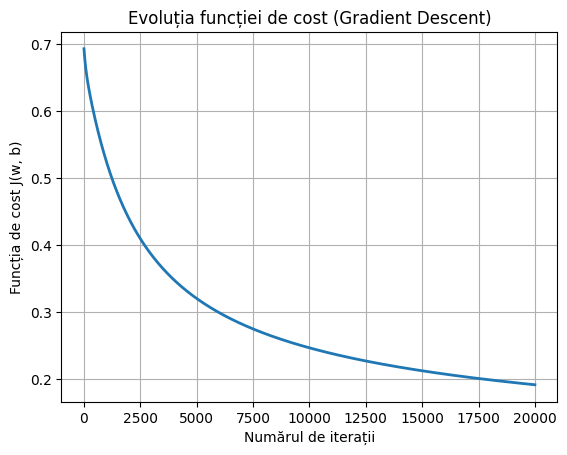

In [ ]:

plt.plot(J_history, linewidth=2)
plt.xlabel("Numărul de iterații")
plt.ylabel("Funcția de cost J(w, b)")
plt.title("Evoluția funcției de cost (Gradient Descent)")
plt.grid(True)
plt.show()

In [ ]:
def predictie(X,w,b,prag):
  m,n=X.shape
  p=np.zeros(m)

  for i in range(m):
    z_wb=0
    for j in range(n):
      z_wb_ij=X[i,j]*w[j]
      z_wb+=z_wb_ij

    z_wb+=b

    f_wb=sigmoid(z_wb)

    if f_wb>prag:
      p[i]=1
    else:
      p[i]=0
  return p

In [ ]:
p=predictie(X_train_scaled,w,b, prag=0.5)
print('Acuratetea antrenamentului este: %f' %(np.mean(p==y_train.flatten())*100))

Acuratetea antrenamentului este: 95.384615


In [ ]:
X_test_scaled=np.array(X_test_scaled)
y_test=np.array(y_test).reshape(-1,1)
p_test=predictie(X_test_scaled,w,b,prag=0.5)
print('Acuratetea testului este: %f' %(np.mean(p_test==y_test.flatten())*100))

Acuratetea testului este: 98.245614


In [ ]:
acc_test = accuracy_score(y_test, p_test) * 100
print(f"Acuratețea pe test: {acc_test:.2f}%\n")

print("Classification Report pe test:\n")
print(classification_report(y_test, p_test, digits=4))

print("Matricea de confuzie pe test:\n")
print(confusion_matrix(y_test, p_test))

Acuratețea pe test: 98.25%

Classification Report pe test:

              precision    recall  f1-score   support

           0     0.9861    0.9861    0.9861        72
           1     0.9762    0.9762    0.9762        42

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

Matricea de confuzie pe test:

[[71  1]
 [ 1 41]]


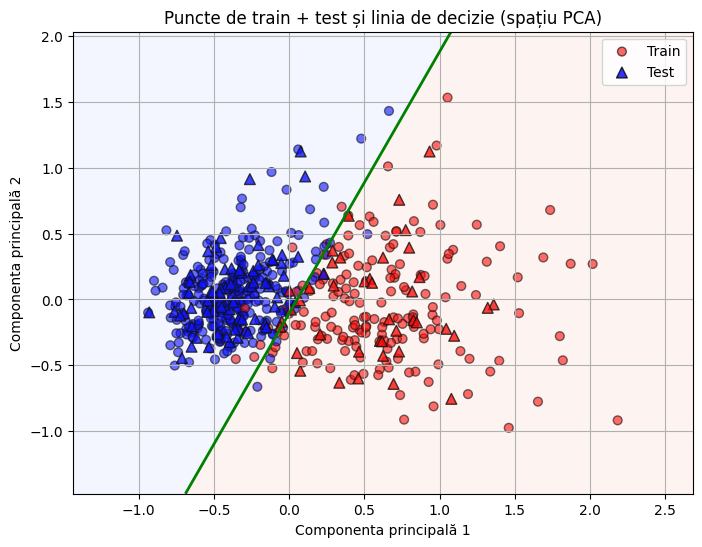

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

from sklearn.linear_model import LogisticRegression
clf_pca = LogisticRegression(penalty=None, solver='lbfgs')
clf_pca.fit(X_train_pca, y_train.flatten())

w0, w1 = clf_pca.coef_[0]
b   = clf_pca.intercept_[0]

x_min, x_max = X_train_pca[:,0].min()-0.5, X_train_pca[:,0].max()+0.5
y_min, y_max = X_train_pca[:,1].min()-0.5, X_train_pca[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf_pca.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(8,6))

plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
            c=y_train.flatten(), cmap='bwr',
            edgecolor='k', alpha=0.6, s=40, label='Train')

plt.scatter(X_test_pca[:,0], X_test_pca[:,1],
            c=y_test, cmap='bwr',
            marker='^', edgecolor='k', alpha=0.8, s=60, label='Test')

plt.contour(xx, yy, probs, levels=[0.5], colors='green', linewidths=2)
plt.contourf(xx, yy, probs, levels=[0,0.5,1], cmap='coolwarm', alpha=0.1)

plt.xlabel('Componenta principală 1')
plt.ylabel('Componenta principală 2')
plt.title('Puncte de train + test și linia de decizie (spațiu PCA)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()